<a href="https://colab.research.google.com/github/xthimylJ/Data-Science-Projects/blob/main/nn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

our neural network will be with only one hidden layer

In [2]:
X_train = np.loadtxt("/content/drive/MyDrive/nural networks with pytorch/data/train_X.csv", delimiter=",").T
y_train = np.loadtxt("/content/drive/MyDrive/nural networks with pytorch/data/train_label.csv", delimiter=",").T

X_test = np.loadtxt("/content/drive/MyDrive/nural networks with pytorch/data/test_X.csv", delimiter=",").T
y_test = np.loadtxt("/content/drive/MyDrive/nural networks with pytorch/data/test_label.csv", delimiter=",").T

In [3]:
y_test[:,5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
# let's have a look of our shapes:

print(f"shape of X train: {X_train.shape}")
print(f"shape of train labels: {y_train.shape}")
print(f"shape of X test: {X_test.shape}")
print(f"shape of test labels: {y_test.shape}")

shape of X train: (784, 1000)
shape of train labels: (10, 1000)
shape of X test: (784, 350)
shape of test labels: (10, 350)


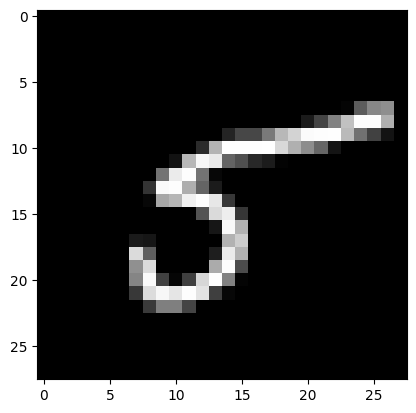

In [5]:
# let's show one of our images

index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28), cmap='grey')
plt.show()



```
shape of X train: (784, 1000)
```
here we have 1000 images. each has 784 features -> pixels


In [23]:
# all function needed and their derivatives:

def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX,axis=0)

In [22]:
def derivative_tanh(x):
    return (1-np.power(x,2))
def derivative_relu(x):
    return np.array(x>0, dtype=np.float32)

initializing parameters

In [8]:
def initializing_parameters(n_x, n_h, n_y): # since we have one hidden layer, we will have 2 weights matrices and 2 bias matrices
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))

    params = {
        "w1": w1,
        "b1": b1,
        "w2":w2,
        "b2": b2
    }
    return params

In [9]:
z =initializing_parameters(4,6,1)
z

{'w1': array([[-0.01803992, -0.00759016, -0.01717401, -0.00822669],
        [-0.03576977, -0.00287098, -0.01473454, -0.02578384],
        [-0.00597558,  0.00668619, -0.011252  ,  0.00872023],
        [-0.01770768,  0.00172068,  0.00276627, -0.00277819],
        [-0.00961946,  0.0110584 , -0.0262217 , -0.00034561],
        [-0.01192962,  0.00065394, -0.00107674, -0.01792489]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'w2': array([[-0.01749959, -0.01155076,  0.00847955, -0.00881625, -0.0066369 ,
          0.01815192]]),
 'b2': array([[0.]])}

implement forward propagation

In [10]:
def forward(x, parameters):
    # extract parameters
    w1 = parameters["w1"]
    b1 = parameters["b1"]

    w2 =parameters["w2"]
    b2 = parameters["b2"]

    z1 = np.dot(w1,x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1) +b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" :a1,
        "z2" : z2,
        "a2" : a2
    }
    return forward_cache

now about the cost function for multiclass classification:  
it returns a single number

In [11]:
def cost_fn(a2, y):
    m = y.shape[1] # number of observations
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

back propagation implementation

In [12]:
def back_prop(x,y, parameters, forward_cache):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    a1 = forward_cache["a1"]
    a2 = forward_cache["a2"]

    m = x.shape[1]

    dz2 = (a2-y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis=1, keepdims=True)

    dz1 = (1/m)*np.dot(dw2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)

    grads = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return grads

gradient descent implementation

In [13]:
def update_param(parameters, gradients, lr):
    w1 = parameters["w1"]
    b1 = parameters["b1"]

    w2 = parameters["w2"]
    b2 = parameters["b2"]

    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1

    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters



training loop

In [25]:
def model(x,y,num_neu_in_hidden_layer, lr, iter):
    num_input_neu = x.shape[0]
    num_output_neu = y.shape[0]

    cost_list = []

    parameters = initializing_parameters(num_input_neu, num_neu_in_hidden_layer, num_output_neu)

    for i in range(iter):
        forward_cache = forward(x, parameters)
        cost = cost_fn(forward_cache["a2"], y)
        gradients = back_prop(x,y, parameters, forward_cache)
        parameters = update_param(parameters, gradients, lr)

        cost_list.append(cost)

        if (i%(iter/10)==0):
            print(f"cost after {i} iterations: {cost}")

    return parameters, cost_list


In [26]:
iterations = 500
neurons_in_hidden_layer = 1000
lr = 0.002
parameters, cost_list = model(X_train, y_train, neurons_in_hidden_layer, lr, iterations)

cost after 0 iterations: 9.177406393410445
cost after 50 iterations: 0.1431937852256471
cost after 100 iterations: 0.06291594674576731
cost after 150 iterations: 0.039080480000285196
cost after 200 iterations: 0.02830592899692831
cost after 250 iterations: 0.02222923805696313
cost after 300 iterations: 0.018322954380281906
cost after 350 iterations: 0.015598263407825627
cost after 400 iterations: 0.013588260892596876
cost after 450 iterations: 0.012043572964754142


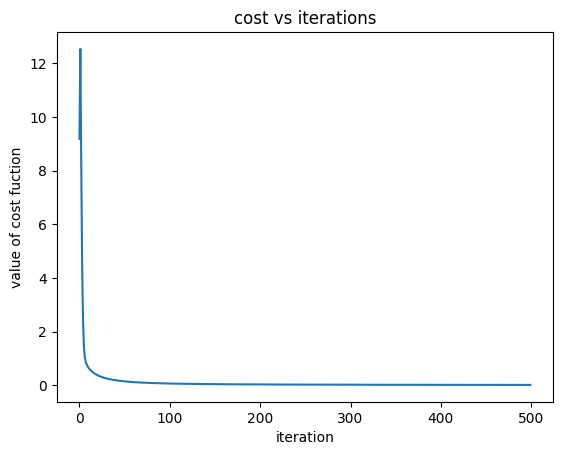

In [28]:
# plot graph cost vs iterations
plt.plot(np.arange(0, iterations), cost_list)
plt.xlabel("iteration")
plt.ylabel("value of cost fuction")
plt.title("cost vs iterations")
plt.show()

In [32]:
def accuracy(inp, labels, parameters):
    forward_cache = forward(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [33]:
print("Accuracy of Train Dataset", accuracy(X_train, y_train, parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, y_test, parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 83.43 %


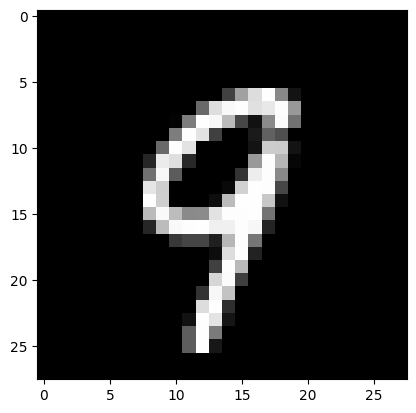

Our model says it is : 9


In [35]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])